# Md. Irfan Hossain

Student of Data Visualization with Python course offered by EMK Center

#### Import required libraries and packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data file as dataframe

In [36]:
df = pd.read_csv("audi.csv")

display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


#### Checking missing values, column types for consistancy

In [37]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
model           10668 non-null object
year            10668 non-null int64
price           10668 non-null int64
transmission    10668 non-null object
mileage         10668 non-null int64
fuelType        10668 non-null object
mpg             10668 non-null float64
engineSize      10668 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.8+ KB


None

#### Creating a function to check columns

In [38]:
def check(data, column):
    df_count=data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    return df_count

#### Checking the 'model' column

In [39]:
model_count = check(df, 'model')
display(model_count.head())

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27


#### Checking the 'year' column

In [40]:
year_count = check(df,'year')
display(year_count.head())

,year,No_of_cars,% of cars
0,2019,3197,29.97
1,2016,1964,18.41
2,2017,1935,18.14
3,2015,999,9.36
4,2018,864,8.10


#### We have to sort the year_count DataFrame based on 'year'

In [41]:
year_count = year_count.sort_values(by='year')
display(year_count)

,year,No_of_cars,% of cars
19,1997,1,0.01
20,1998,1,0.01
18,2002,2,0.02
16,2003,6,0.06
17,2004,5,0.05
15,2005,7,0.07
14,2006,9,0.08
13,2007,16,0.15
12,2008,21,0.20
11,2009,23,0.22


#### Checking the 'transmission' column

In [42]:
transmission_count = check(df,'transmission')
display(transmission_count)

,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


#### Checking the 'fuelType' column

In [43]:
fuelType_count = check(df,'fuelType')
display(fuelType_count)

,fuelType,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


#### Creating a function to show the number of cars for each unique value in a column using a barplot

In [44]:
def bar_plot(data, sub_plot, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Percent of cars present for each " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

#### Plotting subplots to see at a glance how the four categorical variables affecting price

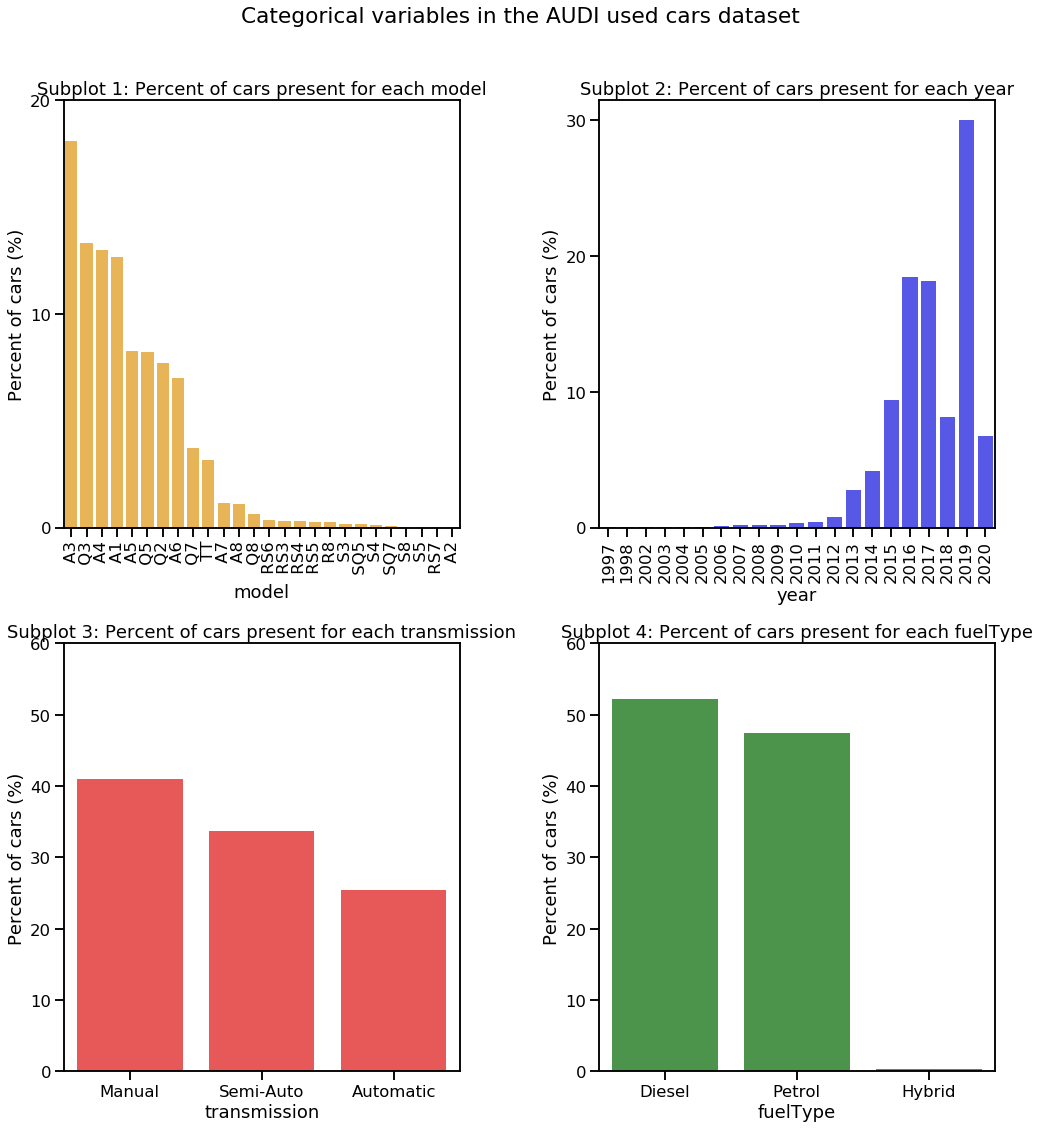

In [45]:
sns.set_context('talk')

plt.figure(figsize=(15,15))

# row 1, column 1
plt.subplot(2,2,1)
bar_plot(model_count, '1', 'model', 'orange', 90, np.arange(0,21,10))

# row 1, column 2
plt.subplot(2,2,2)
bar_plot(year_count, '2', 'year', 'blue', 90, np.arange(0,36,10))

# row 2, column 1
plt.subplot(2,2,3)
bar_plot(transmission_count, '3', 'transmission', 'red', 0, np.arange(0,61,10))

# row 2, column 2
plt.subplot(2,2,4)
bar_plot(fuelType_count, '4', 'fuelType', 'green', 0, np.arange(0,61,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- From the subplot 1, we see that a major portion of these Audi cars belongs to model "A3" to "TT" - though other models are present but they are in negligible amount.
- Subplot 2 informs us that maximum cars were built from 2013 to 2020. Notable 30% cars were built in 2019.
- From the subplot 3, it is clear that major portion of the cars have manual type of transmission followed by semi-auto and automatic.
- Subplot 4 tells us half of these cars were run by diesel, followed by petrol. A negligible amount of cars are using hybrid type of fuel.

#### Creating a function to show scatterplot of the number of cars for each unique value in a column vs price to find whether there exists any relation

In [46]:
def scar_plot(data, sub_plot, column_x, column_y):
    
    # create a scatterplot using seaborn
    sns.scatterplot(x=column_x, y=column_y, data=data)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Price vs. " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel(column_y)

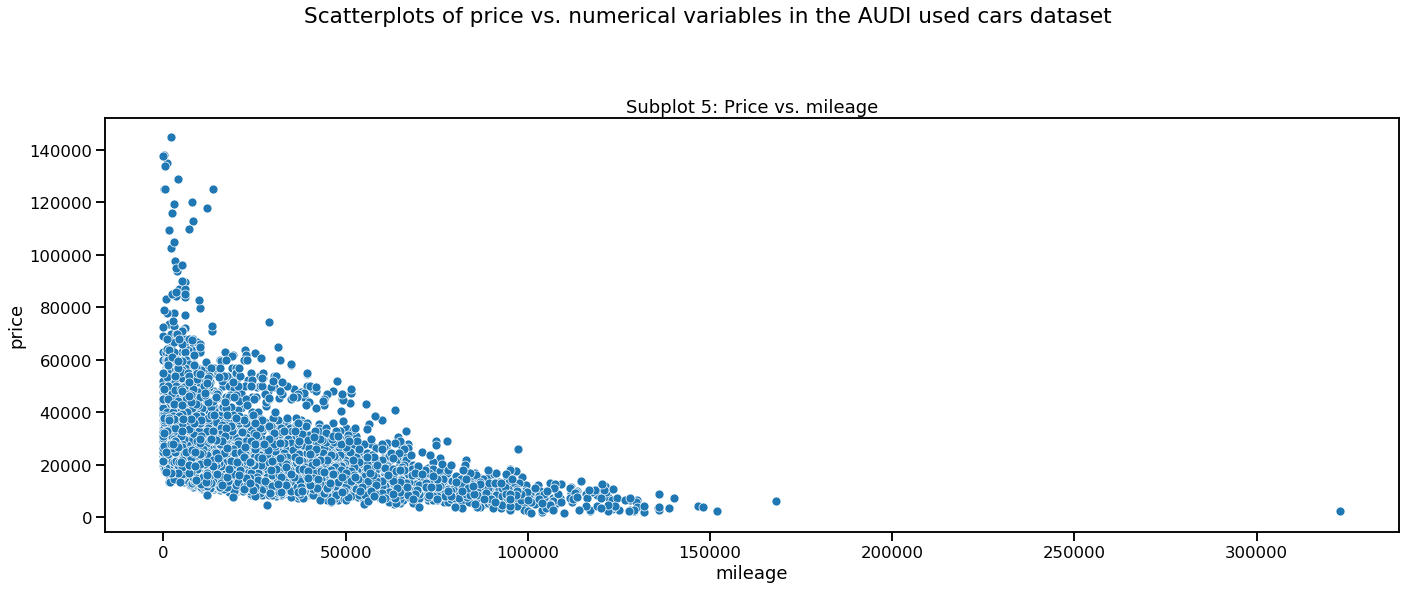

In [47]:
plt.figure(figsize=(20,20))

# Price vs mileage
plt.subplot(3,1,1)
scar_plot(df,'5','mileage','price')

# Price vs mpg
#plt.subplot(3,1,2)
#scar_plot(df,'6','mpg','price')

# Price vs engineSize
#plt.subplot(3,1,3)
#scar_plot(df,'7','engineSize','price')

# write the title for all the plots
plt.suptitle("Scatterplots of price vs. numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- The data have some extreme observations. In subplot 5 there is a curvilinear relationship between mileage and price. However discarding those we may assume the price decreases with increasing mileage.

#### Implementing a hue parameter in the function to see interlinkages between 3 variables

In [48]:
def scar_plot2(data, sub_plot, column_x, column_y, hue):
    
    # create a scatterplot using seaborn
    sns.scatterplot(x=column_x, y=column_y, data=data, hue=hue)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Price vs. " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel(column_y)

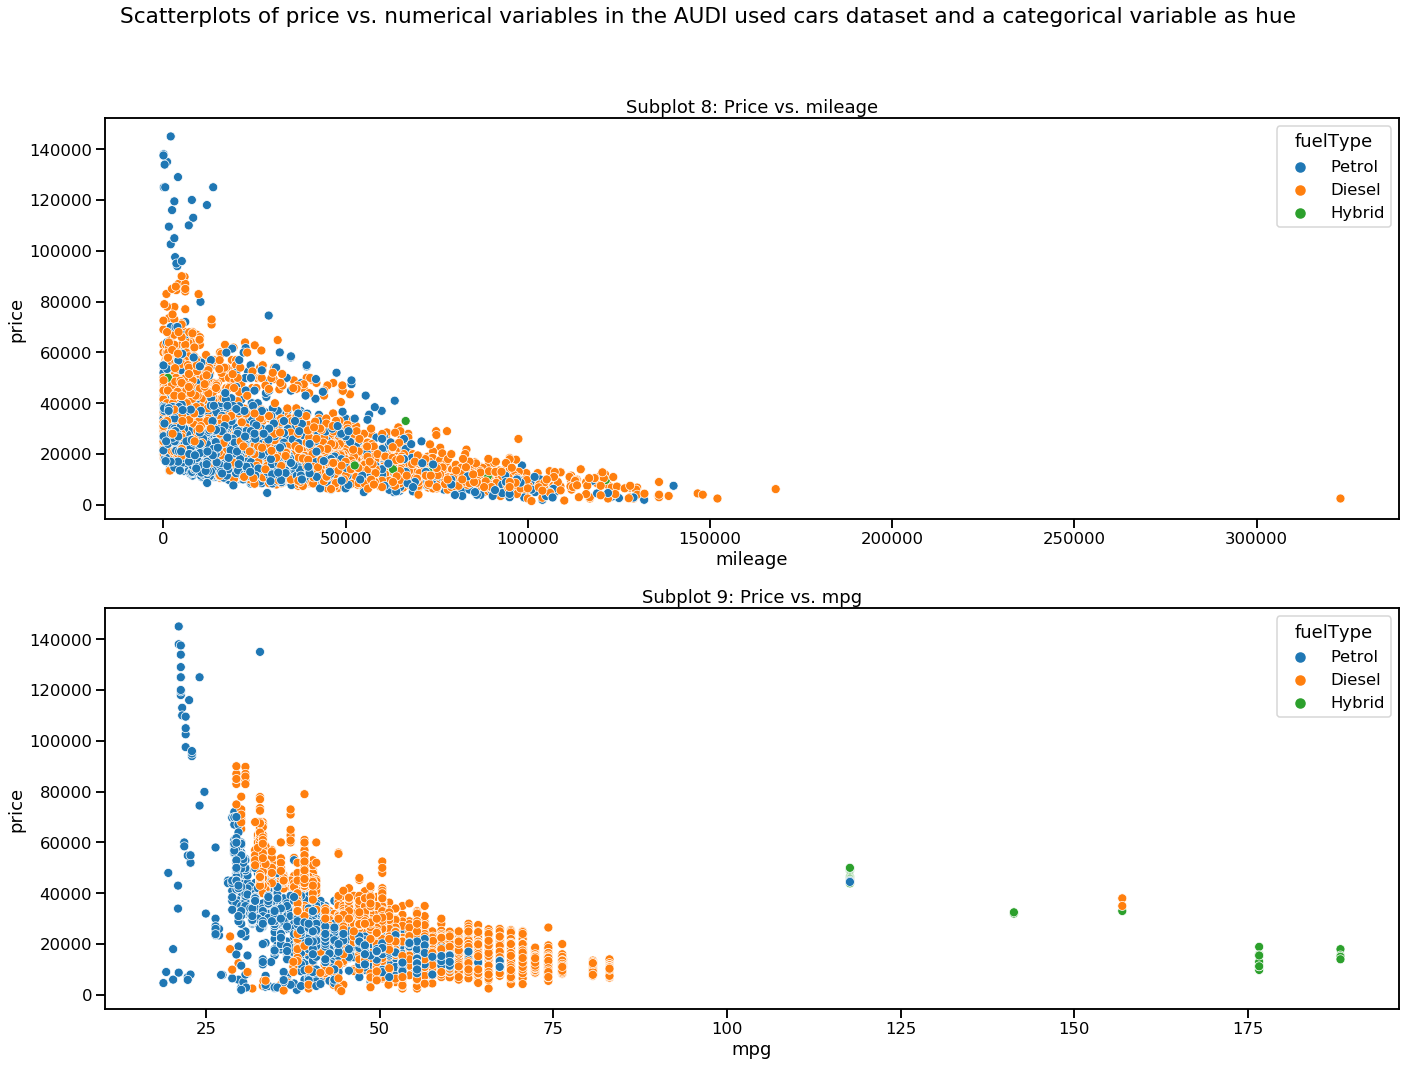

In [49]:
plt.figure(figsize=(20,20))

# Price vs mileage with fuelType as hue
plt.subplot(3,1,1)
scar_plot2(df,'8','mileage','price','fuelType')

# Price vs mpg with fuelType as hue
plt.subplot(3,1,2)
scar_plot2(df,'9','mpg','price','fuelType')

# Price vs engineSize with fuelType as hue
#plt.subplot(3,1,3)
#scar_plot2(df,'10','engineSize','price','fuelType')

# write the title for all the plots
plt.suptitle("Scatterplots of price vs. numerical variables in the AUDI used cars dataset and a categorical variable as hue", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Subplot 8 informs us that for the cars that used diesel, there is a curvi-linear relation between mileage and price
- From subplot 9 it is clear that there is a few number of cars that used hybrid type of fuel and for those cars a contradictory findings is if mpg is high price is low. Most of petrol driven cars has low mpg and high price.

#### Using histogram to see the distribution of numerical variables in the dataset

In [50]:
def hist_plot(data, sub_plot, x, binw,color):
    
    # create a histogram using seaborn
    sns.histplot(data=data, x=x, binwidth=binw,kde=True, color=color, fill=False)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Histogram of " + x)
    
    # write proper label for the x axis
    plt.xlabel(x)


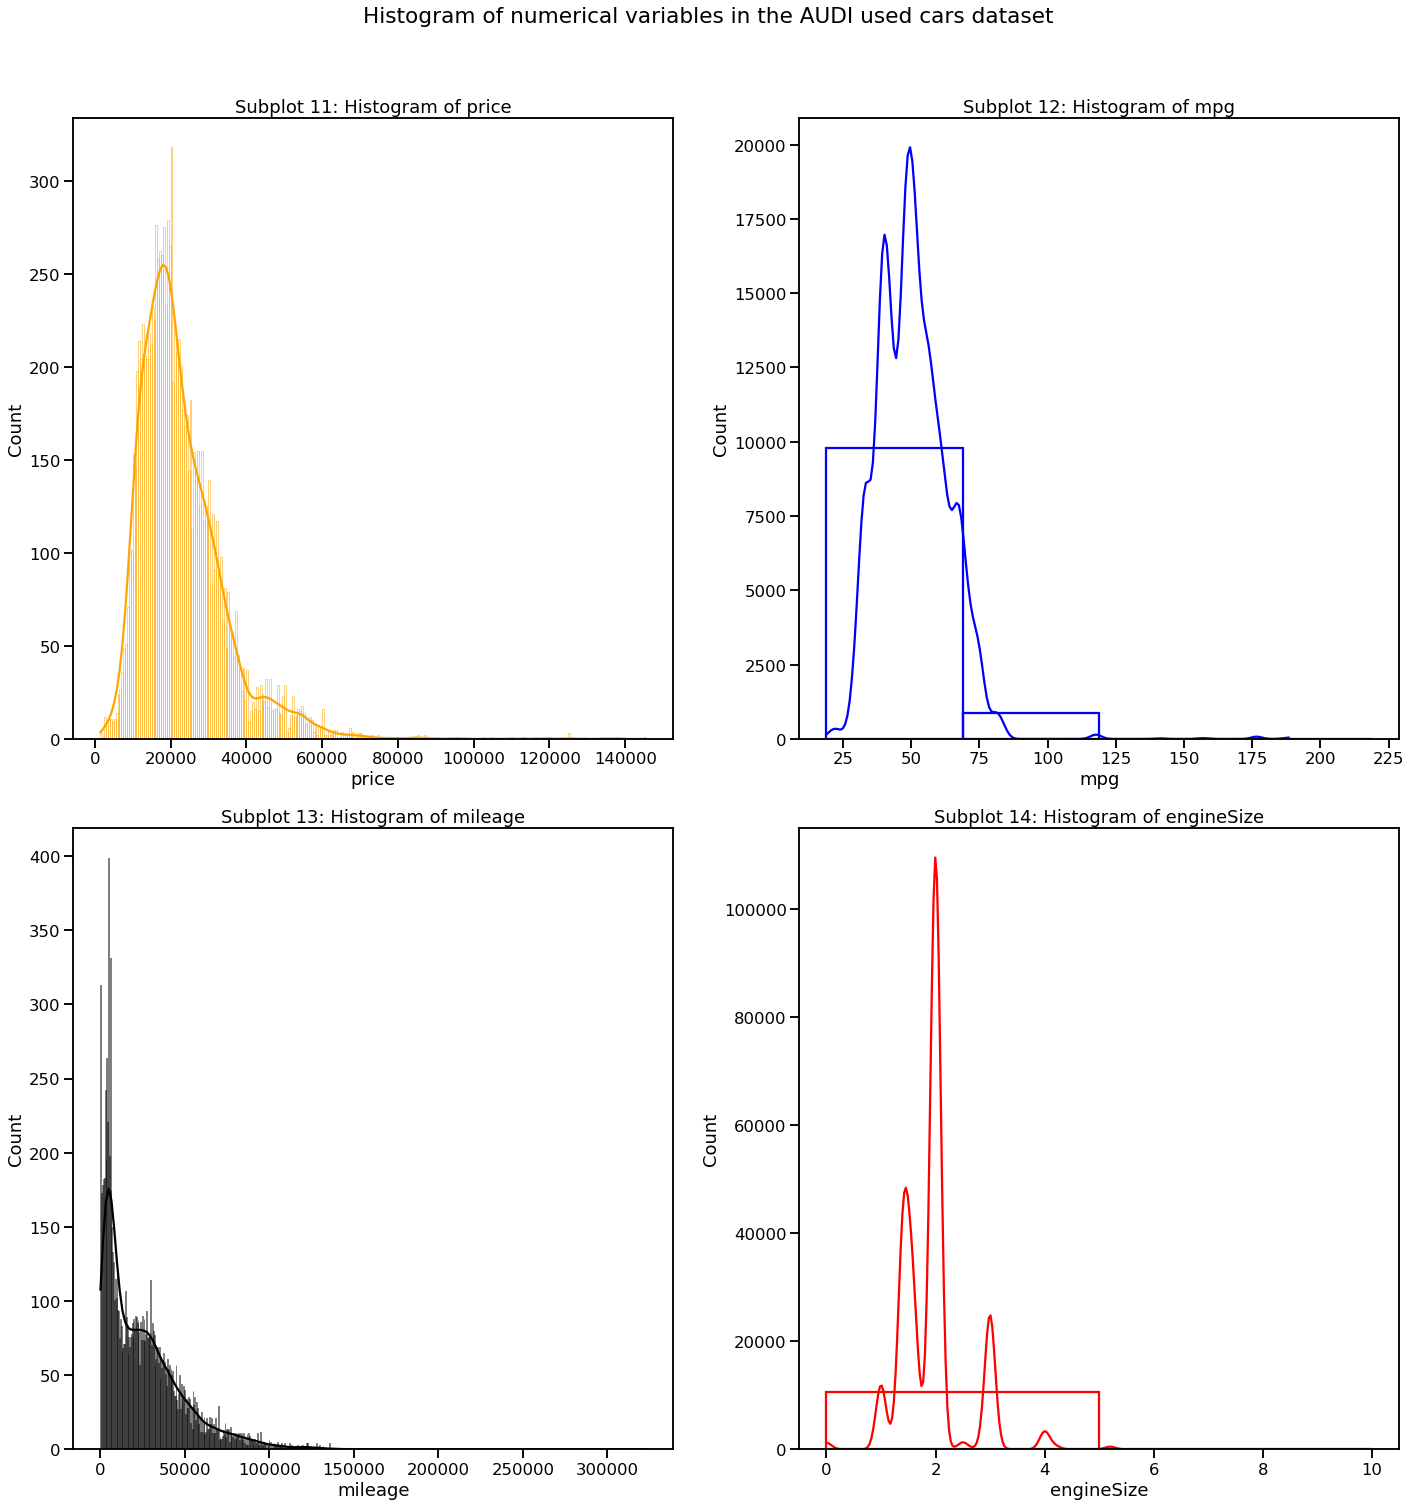

In [51]:
plt.figure(figsize=(20,20))

#histogram for price
plt.subplot(2,2,1)
hist_plot(data=df,sub_plot='11', x='price', binw=500, color='orange')

#histogram for mpg
plt.subplot(2,2,2)
hist_plot(data=df,sub_plot='12', x='mpg', binw=50, color='blue')

#histogram for mileage
plt.subplot(2,2,3)
hist_plot(data=df,sub_plot='13', x='mileage', binw=500, color='black')

#histogram for engineSize
plt.subplot(2,2,4)
hist_plot(data=df,sub_plot='14', x='engineSize', binw=5, color='red')


# write the title for all the plots
plt.suptitle("Histogram of numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Subplot 11 shows almost normal curve it we consider price from 0-4000 USD, however some data points beyone 4000USD make this variable (price) to follow positively skewed distribution.
- Subplot 12 indicates mpg follows positively skewed distribution.
- Subplot 13 indicates mileage follows positively skewed distribution.
- Subplot 14 shows engineSize is more or lest normally distributed but its leptokurtic - that is variation from mean value 2 is low.

#### ECDF for numercial variables in the dataset

In [52]:
def ecdf_plot(data, sub_plot, x, binw,color):
    
    # create a histogram using seaborn
    sns.histplot(data=data, x=x, binwidth=binw, cumulative=True, stat='probability', color=color)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": ECDF of " + x)
    
    # write proper label for the x axis
    plt.xlabel(x)

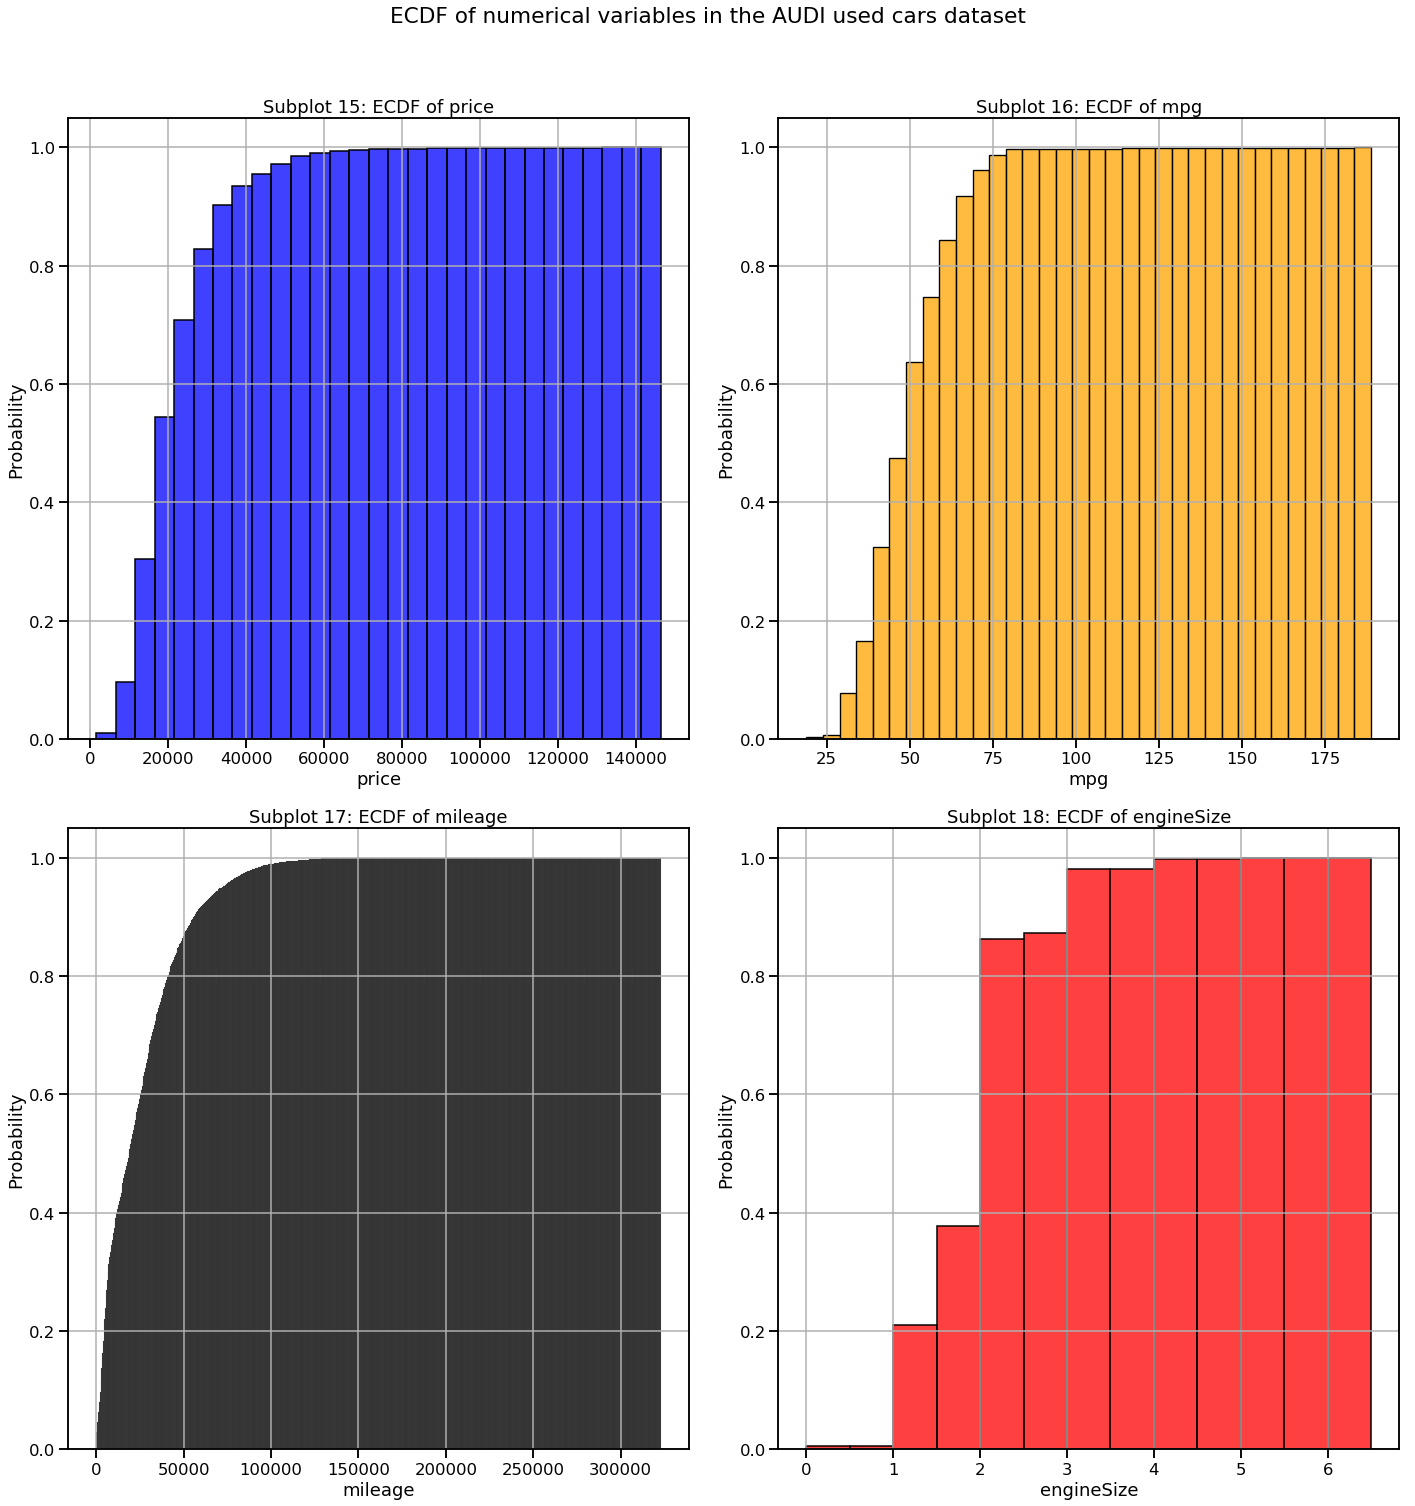

In [53]:
plt.figure(figsize=(20,20))

#ECDF for price
plt.subplot(2,2,1)
ecdf_plot(data=df,sub_plot='15', x='price', binw=5000, color='blue')
plt.grid()

#ECDF for mpg
plt.subplot(2,2,2)
ecdf_plot(data=df,sub_plot='16', x='mpg', binw=5, color='orange')
plt.grid()

#ECDF for mileage
plt.subplot(2,2,3)
ecdf_plot(data=df,sub_plot='17', x='mileage', binw=500, color='black')
plt.grid()

#ECDF for engineSize
plt.subplot(2,2,4)
ecdf_plot(data=df,sub_plot='18', x='engineSize', binw=0.5, color='red')
plt.grid()

# write the title for all the plots
plt.suptitle("ECDF of numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- From subplot 15, we observe that there is 55% probability that an used car of AUDI in this dataset has a price of 20000USD or less.
- Subplot 15 depicts us 50% of the used AUDI cars possess mpg 50 or less.
- In subplot 17, we see almost 90% of the AUDI used cars have mileage 50,000 miles or less.
- Subplot 18 provides us insight that there is less than 40% chance that AUDI used cars in this dataset have engine size of 2 or less.

#### Analysis using bar plots of numerical variables

###### Seperate numercial variables from the dataset

In [54]:
def sep_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [55]:
#running the function and see the numerical variable names

num_cols = sep_num_cols(df)

print(num_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


#### Using loop to create box plot for numerical variables

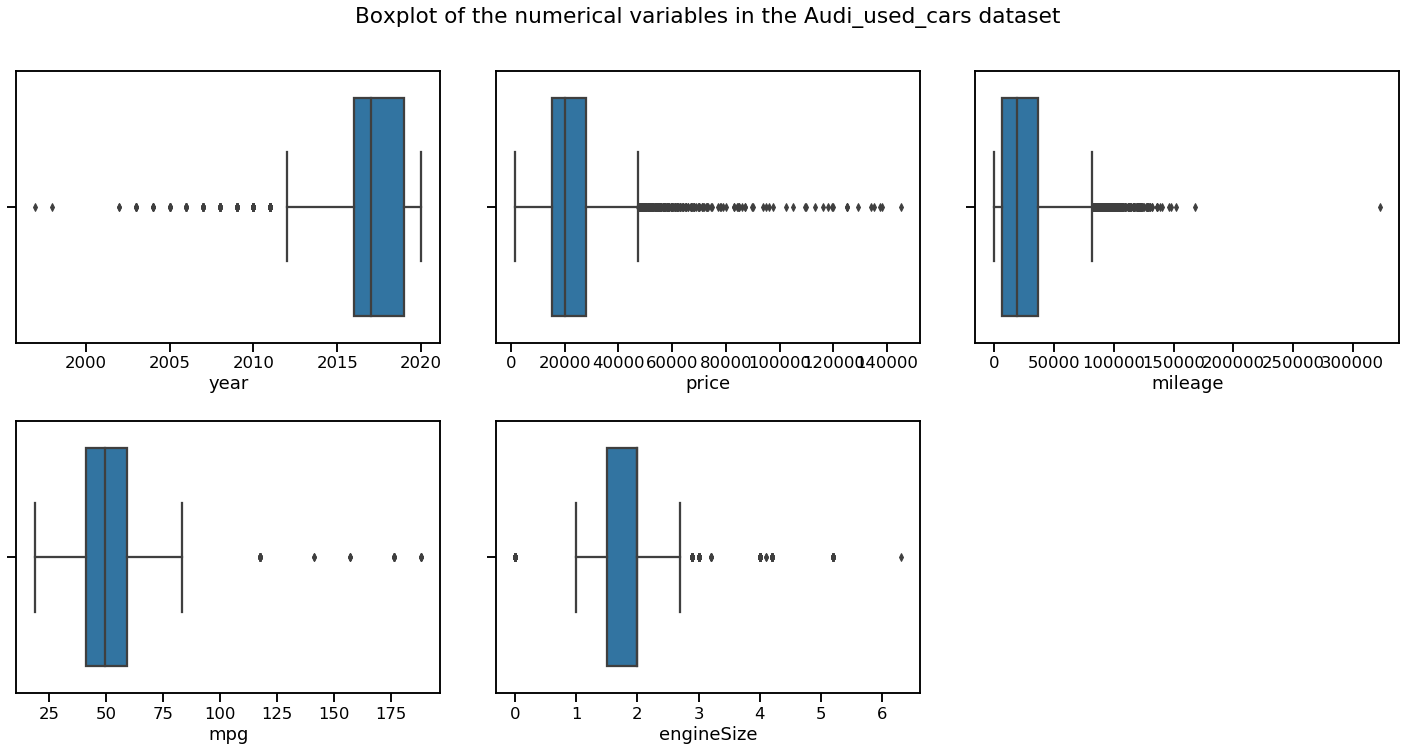

In [56]:
plt.figure(figsize=(20,10))
#using loop
for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[num_cols[index]])
    
# write the title for all the plots
plt.suptitle("Boxplot of the numerical variables in the Audi_used_cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Boxplot of year variable reveals that 25% to 75% cars were built between 2016 & 2019 and 50% cars were built on 2017.
- Median price of these Audi used cars is 20,000 USD
- 75% of these cars have mileage below 50,000 miles.
- 50% Audi used cars in these dataset have 50 mpg
- 75% these cars have 2 Liter engine